In [1]:
import pandas as pd, numpy as np
from skimage import io

In [2]:
data = pd.read_csv('https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv')

In [3]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [4]:
data[['_unit_id','image_url','please_select_the_gender_of_the_person_in_the_picture']].head()

,_unit_id,image_url,please_select_the_gender_of_the_person_in_the_picture
0,1023132475,https://d1qb2nb5cznatu.cloudfront.net/users/40...,male
1,1023132476,https://d1qb2nb5cznatu.cloudfront.net/users/42...,male
2,1023132477,https://d1qb2nb5cznatu.cloudfront.net/users/44...,male
3,1023132478,https://d1qb2nb5cznatu.cloudfront.net/users/47...,male
4,1023132479,https://d1qb2nb5cznatu.cloudfront.net/users/50...,male


In [5]:
data['please_select_the_gender_of_the_person_in_the_picture'].value_counts()

male      47595
unsure     9122
female     7367
Name: please_select_the_gender_of_the_person_in_the_picture, dtype: int64

In [6]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
data_female = data[data['please_select_the_gender_of_the_person_in_the_picture']=="female"].reset_index(drop='index')

In [11]:
len(data_male), len(data_female)

(47595, 7367)

In [7]:
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')
final_data.shape

(2000, 10)

In [12]:
final_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [54]:
final_data.image_url[2]
                    

'https://d1qb2nb5cznatu.cloudfront.net/users/44-large'

In [8]:
final_data.loc[1200]

_unit_id                                                                                                   1023135686
_golden                                                                                                         False
_unit_state                                                                                                 finalized
_trusted_judgments                                                                                                  1
_last_judgment_at                                                                                  8/19/2016 22:31:27
please_select_the_gender_of_the_person_in_the_picture                                                          female
please_select_the_gender_of_the_person_in_the_picture:confidence                                                    1
image_url                                                           https://d1qb2nb5cznatu.cloudfront.net/users/29...
please_select_the_gender_of_the_person_in_the_picture_go

In [9]:
x = []
y = []
for i in range(final_data.shape[0]):
  if(i%100==0):
    print(i)
  try:
    image = io.imread(final_data.loc[i]['image_url'])
    if(image.shape==(300,300,3)):
      x.append(image)
      y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
  except:
    continue

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


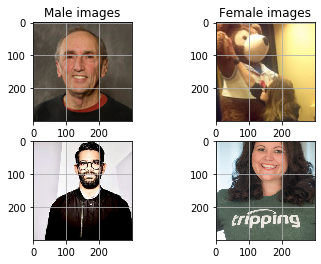

In [10]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.title('Male images')
plt.grid('off')
plt.subplot(222)
plt.title('Female images')
plt.imshow(x[1000])
plt.grid('off')
plt.subplot(223)
plt.imshow(x[1])
plt.grid('off')
plt.subplot(224)
plt.imshow(x[1001])
plt.grid('off')
plt.show()

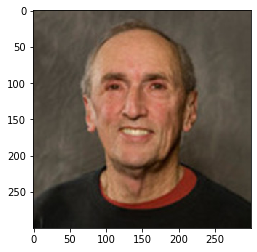

In [15]:
plt.imshow(x[0])

In [17]:
final_data.loc[1]['image_url']

'https://d1qb2nb5cznatu.cloudfront.net/users/42-large'

In [19]:
image2 = io.imread(final_data.loc[2]['image_url'])
image2

Array([[[ 52,  51,  58],
        [ 35,  34,  41],
        [ 28,  26,  34],
        ...,
        [ 13,  10,  12],
        [ 16,  13,  13],
        [ 17,  14,  16]],

       [[ 54,  53,  60],
        [ 37,  36,  43],
        [ 23,  22,  29],
        ...,
        [ 15,  13,  15],
        [ 16,  14,  15],
        [ 16,  14,  15]],

       [[ 38,  37,  44],
        [ 33,  32,  39],
        [ 29,  28,  35],
        ...,
        [ 15,  12,  15],
        [ 15,  13,  13],
        [ 16,  13,  14]],

       ...,

       [[ 76,  47,  48],
        [ 76,  48,  49],
        [ 77,  49,  50],
        ...,
        [126, 111, 119],
        [ 61,  51,  61],
        [  6,   0,   6]],

       [[ 74,  46,  48],
        [ 75,  46,  48],
        [ 75,  47,  50],
        ...,
        [132, 119, 128],
        [ 89,  80,  92],
        [ 14,   7,  18]],

       [[ 72,  45,  47],
        [ 73,  45,  48],
        [ 74,  46,  48],
        ...,
        [115, 100, 110],
        [110, 101, 121],
        [ 33,  27,  41]]

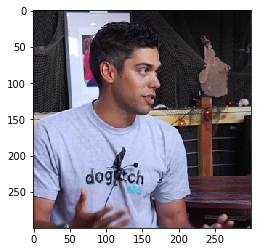

In [21]:
plt.imshow(image2)

In [46]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [47]:
import cv2

In [48]:
x2 = []
y2 = []
for i in range(len(x)):
  img = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)
  img2 = cv2.resize(img,(50,50))
  x2.append(img2)
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [49]:
x2[0]

array([[82, 87, 80, ..., 76, 77, 77],
       [79, 80, 86, ..., 75, 77, 74],
       [84, 79, 73, ..., 73, 75, 75],
       ...,
       [28, 26, 19, ..., 16, 16, 15],
       [14, 24, 15, ..., 12, 14, 13],
       [12, 20, 13, ..., 12, 13, 13]], dtype=uint8)

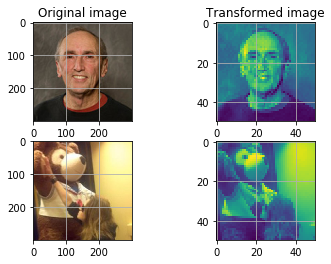

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.title('Original image')
plt.grid('off')
plt.subplot(222)
plt.title('Transformed image')
plt.imshow(x2[0])
plt.grid('off')
plt.subplot(223)
plt.imshow(x[1000])
plt.grid('off')
plt.subplot(224)
plt.imshow(x2[1000])
plt.grid('off')
plt.show()

In [51]:
x2[0]

array([[82, 87, 80, ..., 76, 77, 77],
       [79, 80, 86, ..., 75, 77, 74],
       [84, 79, 73, ..., 73, 75, 75],
       ...,
       [28, 26, 19, ..., 16, 16, 15],
       [14, 24, 15, ..., 12, 14, 13],
       [12, 20, 13, ..., 12, 13, 13]], dtype=uint8)

In [60]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],1)

In [61]:
X = np.array(x2)/255
Y = np.array(y2)

In [62]:
Y[5],y[5]

(1, 'male')

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [77]:
X_train.shape

(1569, 50, 50, 1)

In [78]:
import tensorflow as tf 
from tensorflow import keras

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

In [79]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10,(3,3), input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50,50,1)),
    tf.keras.layers.MaxPooling2D(5,5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [81]:
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 512)        

In [82]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
history = model.fit(X_train, y_train, batch_size=32,epochs=50,verbose=1,validation_data = (X_test, y_test))

Train on 1569 samples, validate on 175 samples
Epoch 1/50
  32/1569 [..............................] - ETA: 3:35

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_2/conv2d_9/Conv2D (defined at <ipython-input-83-58d9676bb766>:1) ]] [Op:__inference_distributed_function_1490]

Function call stack:
distributed_function


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)